In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional

GT_path = '/DATASERVER/MIC/SHARED/NYU_FastMRI/Preprocessed/multicoil_test_full/'
#reconstruction_ZF_path = '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/Results/Reconstructions/ZeroFilled/reconstructions/'
#reconstruction_ZF_noACS_path = '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/Results/Reconstructions/ZeroFilledNoACS/reconstructions/'
#reconstruction_ZF_noACS_cs_path = '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/Results/Reconstructions/ZeroFilledNoACSCS/reconstructions/'
reconstruction_grappa_path = '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/Results/Reconstructions/Grappa/'
reconstruction_sense_path = '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/Results/Reconstructions/Sense/'
reconstruction_CS_path = '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/Results/Reconstructions/CS/'
#reconstruction_ZF_unet_path = '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/Results/Reconstructions/BaselineUNet/Epoch47/reconstructions_regularized/'
#reconstruction_ZF_unet_noACS_path = '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/Results/Reconstructions/BaselineUNetSenseMask/Epoch48/reconstructions_regularized/'
reconstruction_grappa_unet_path = '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/Results/Reconstructions/GrappaUNet/reconstructions/'
reconstruction_sense_unet_path = '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/Results/Reconstructions/SenseUNet/reconstructions/'
reconstruction_cs_unet_path = '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/Results/Reconstructions/CSUNet/reconstructions/'

file = 'file_brain_AXFLAIR_210_6001516.h5'  # R = 8 (global 24th-26th percentile)
slice = 3

GT_path = os.path.join(GT_path,file)
#reconstruction_ZF_path = os.path.join(reconstruction_ZF_path,file)
#reconstruction_ZF_noACS_path = os.path.join(reconstruction_ZF_noACS_path,file)
#reconstruction_ZF_noACS_cs_path = os.path.join(reconstruction_ZF_noACS_cs_path,file)
reconstruction_grappa_path = os.path.join(reconstruction_grappa_path,file)
reconstruction_sense_path = os.path.join(reconstruction_sense_path,file)
reconstruction_CS_path = os.path.join(reconstruction_CS_path,file)
#reconstruction_ZF_unet_path = os.path.join(reconstruction_ZF_unet_path,file)
#reconstruction_ZF_unet_noACS_path = os.path.join(reconstruction_ZF_unet_noACS_path,file)
reconstruction_grappa_unet_path = os.path.join(reconstruction_grappa_unet_path,file)
reconstruction_sense_unet_path = os.path.join(reconstruction_sense_unet_path,file)
reconstruction_cs_unet_path = os.path.join(reconstruction_cs_unet_path,file)

GT = h5py.File(GT_path, 'r')
# reconstruction_ZF = h5py.File(reconstruction_ZF_path, 'r')
# reconstruction_ZF_noACS = h5py.File(reconstruction_ZF_noACS_path, 'r')
# reconstruction_ZF_noACS_cs = h5py.File(reconstruction_ZF_noACS_cs_path, 'r')
reconstruction_grappa = h5py.File(reconstruction_grappa_path, 'r')
reconstruction_sense = h5py.File(reconstruction_sense_path, 'r')
reconstruction_CS = h5py.File(reconstruction_CS_path, 'r')
# reconstruction_ZF_unet = h5py.File(reconstruction_ZF_unet_path, 'r')
# reconstruction_ZF_unet_noACS = h5py.File(reconstruction_ZF_unet_noACS_path, 'r')
reconstruction_grappa_unet = h5py.File(reconstruction_grappa_unet_path, 'r')
reconstruction_sense_unet = h5py.File(reconstruction_sense_unet_path, 'r')
reconstruction_cs_unet = h5py.File(reconstruction_cs_unet_path, 'r')


In [2]:
GT = GT['reconstruction_rss']
# reconstruction_ZF = reconstruction_ZF['reconstruction']
# reconstruction_ZF_noACS = reconstruction_ZF_noACS['reconstruction']
# reconstruction_ZF_noACS_cs = reconstruction_ZF_noACS_cs['reconstruction']
reconstruction_grappa = reconstruction_grappa['reconstruction']
reconstruction_sense = reconstruction_sense['reconstruction']
reconstruction_CS = reconstruction_CS['reconstruction']
# reconstruction_ZF_unet = reconstruction_ZF_unet['reconstruction']
# reconstruction_ZF_unet_noACS = reconstruction_ZF_unet_noACS['reconstruction']
reconstruction_grappa_unet = reconstruction_grappa_unet['reconstruction']
reconstruction_sense_unet = reconstruction_sense_unet['reconstruction']
reconstruction_cs_unet = reconstruction_cs_unet['reconstruction']


In [3]:
GT = np.array(GT)
# reconstruction_ZF = np.array(reconstruction_ZF)
# reconstruction_ZF_noACS = np.array(reconstruction_ZF_noACS)
# reconstruction_ZF_noACS_cs = np.array(reconstruction_ZF_noACS_cs)
reconstruction_grappa = np.array(reconstruction_grappa)
reconstruction_sense = np.array(reconstruction_sense)
reconstruction_CS = np.array(reconstruction_CS)
# reconstruction_ZF_unet = np.array(reconstruction_ZF_unet)
# reconstruction_ZF_unet_noACS = np.array(reconstruction_ZF_unet_noACS)
reconstruction_grappa_unet = np.array(reconstruction_grappa_unet)
reconstruction_sense_unet = np.array(reconstruction_sense_unet)
reconstruction_cs_unet = np.array(reconstruction_cs_unet)


In [4]:
def comp_img(img,crop_size):
    s = img.shape
    start_height = s[1]//2 - (crop_size[1]//2)
    start_width = s[2]//2 - (crop_size[2]//2)
    return img[:,start_height:(start_height+crop_size[1]),start_width:(start_width+crop_size[2])]

dim1 = GT.shape[1]
dim2 = GT.shape[2]
# reconstruction_ZF = comp_img(reconstruction_ZF,(reconstruction_ZF.shape[0],dim1,dim2))
# reconstruction_ZF_noACS = comp_img(reconstruction_ZF_noACS,(reconstruction_ZF_noACS.shape[0],dim1,dim2))
# reconstruction_ZF_noACS_cs = comp_img(reconstruction_ZF_noACS_cs,(reconstruction_ZF_noACS_cs.shape[0],dim1,dim2))
reconstruction_grappa = comp_img(reconstruction_grappa,(reconstruction_grappa.shape[0],dim1,dim2))
reconstruction_sense = comp_img(reconstruction_sense,(reconstruction_sense.shape[0],dim1,dim2))
reconstruction_CS = comp_img(reconstruction_CS,(reconstruction_CS.shape[0],dim1,dim2))


In [5]:
import torch
from torchvision.models import vgg19
from torchvision.transforms import Compose, ToTensor, Normalize, CenterCrop, Lambda
from skimage.metrics import peak_signal_noise_ratio, structural_similarity


preprocess = Compose([
    ToTensor(),
    CenterCrop((224, 224)), # Ensure the center part of the image is used
    Lambda(lambda x: x.repeat(3, 1, 1) if x.size(0)==1 else x),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def vgg_loss(gt: np.ndarray, pred: np.ndarray) -> np.ndarray:
    """Compute VGG loss metric."""
    # Load the pre-trained VGG19 model
    vgg = vgg19(pretrained=True).features

    # Remove the last max pooling layer to get the feature maps
    vgg = torch.nn.Sequential(*list(vgg.children())[:-1])

    # Initialize a list to store the losses for each image in the batch
    losses = []

    # Convert inputs to the expected pixel range for RGB networks
    gt = gt*255
    pred = pred*255

    # Loop over each image in the batch
    for gt_image, pred_image in zip(gt, pred):
        # Preprocess the images
        gt_image = preprocess(gt_image)
        pred_image = preprocess(pred_image)

        # Ensure the images are batched
        gt_image = gt_image.unsqueeze(0)
        pred_image = pred_image.unsqueeze(0)

        # Extract features
        gt_features = vgg(gt_image)
        pred_features = vgg(pred_image)

        # Calculate VGG loss for the current pair of images
        loss = torch.nn.functional.mse_loss(gt_features, pred_features)
        losses.append(loss)

    # Average the losses across all images in the batch
    avg_loss = torch.mean(torch.stack(losses))

    return avg_loss.detach().cpu().numpy()


def stacked_svd(gt: np.ndarray, pred: np.ndarray) -> np.ndarray:
    """
    Compute the average number of Singular Values required 
    to explain 90% of the variance in the residual error maps 
    of the reconstruction
    """
    residual_error_map = (gt-pred)**2
    U, S, Vh = np.linalg.svd(residual_error_map, full_matrices=True)
    num_slices = S.shape[0]
    im_size = S.shape[-1]
    singular_values_1d = S.flatten()
    abs_core = np.abs(singular_values_1d)
    sorted_indices = abs_core.argsort()[::-1]
    sorted_core = abs_core[sorted_indices]

    total_variance = np.sum(np.abs(sorted_core))

    # Calculate the cumulative sum of singular values
    cumulative_sum = np.cumsum(np.abs(sorted_core))

    num_svs = np.where(cumulative_sum >= 0.9*total_variance)[0][0] + 1

    num_svs_average = num_svs / num_slices

    return num_svs_average / im_size


def mse(gt: np.ndarray, pred: np.ndarray) -> np.ndarray:
    """Compute Mean Squared Error (MSE)"""
    return np.mean((gt - pred) ** 2)


def nmse(gt: np.ndarray, pred: np.ndarray) -> np.ndarray:
    """Compute Normalized Mean Squared Error (NMSE)"""
    return np.array(np.linalg.norm(gt - pred) ** 2 / np.linalg.norm(gt) ** 2)


def psnr(
    gt: np.ndarray, pred: np.ndarray, maxval: Optional[float] = None
) -> np.ndarray:
    """Compute Peak Signal to Noise Ratio metric (PSNR)"""
    if maxval is None:
        maxval = gt.max()
    return peak_signal_noise_ratio(gt, pred, data_range=maxval)


def ssim(
    gt: np.ndarray, pred: np.ndarray, maxval: Optional[float] = None
) -> np.ndarray:
    """Compute Structural Similarity Index Metric (SSIM)"""
    if not gt.ndim == 3:
        raise ValueError("Unexpected number of dimensions in ground truth.")
    if not gt.ndim == pred.ndim:
        raise ValueError("Ground truth dimensions does not match pred.")

    maxval = gt.max() if maxval is None else maxval

    ssim = np.array([0])
    for slice_num in range(gt.shape[0]):
        ssim = ssim + structural_similarity(
            gt[slice_num], pred[slice_num], data_range=maxval
        )

    return ssim / gt.shape[0]


/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/conda/envs/DL_MRI_reconstruction_baselines/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
CS_bitmask = np.ones_like(reconstruction_CS)
CS_bitmask = np.where(reconstruction_CS != 0, CS_bitmask, 0).astype(int)


In [7]:
sense_bitmask = np.ones_like(reconstruction_sense)
sense_bitmask = np.where(reconstruction_sense != 0, sense_bitmask, 0).astype(int)


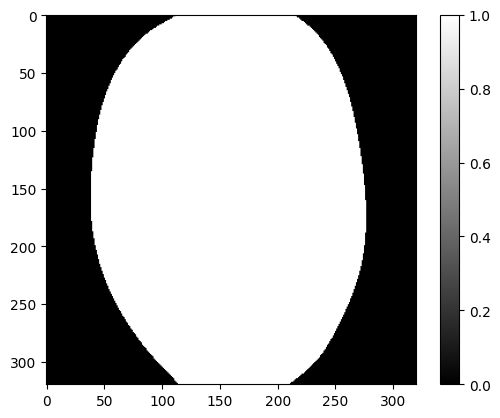

In [8]:
intersection_mask = CS_bitmask & sense_bitmask
plt.imshow(intersection_mask[slice], cmap='gray')
plt.colorbar()


In [9]:
def nmse_mask(gt: np.ndarray, pred: np.ndarray, mask: np.ndarray) -> np.ndarray:
    gt = np.where(mask == 1, gt, 0)
    pred = np.where(mask == 1, pred, 0)
    return nmse(gt,pred)

def psnr_mask(gt: np.ndarray, pred: np.ndarray, mask: np.ndarray) -> np.ndarray:
    gt = np.where(mask == 1, gt, 0)
    pred = np.where(mask == 1, pred, 0)
    return psnr(gt,pred)

def ssim_mask(gt: np.ndarray, pred: np.ndarray, mask: np.ndarray) -> np.ndarray:
    gt = np.where(mask == 1, gt, 0)
    pred = np.where(mask == 1, pred, 0)
    return ssim(gt,pred)

def vgg_loss_mask(gt: np.ndarray, pred: np.ndarray, mask: np.ndarray) -> np.ndarray:
    gt = np.where(mask == 1, gt, 0)
    pred = np.where(mask == 1, pred, 0)
    return vgg_loss(gt,pred)

def stacked_svd_mask(gt: np.ndarray, pred: np.ndarray, mask: np.ndarray) -> np.ndarray:
    gt = np.where(mask == 1, gt, 0)
    pred = np.where(mask == 1, pred, 0)
    return stacked_svd(gt,pred)


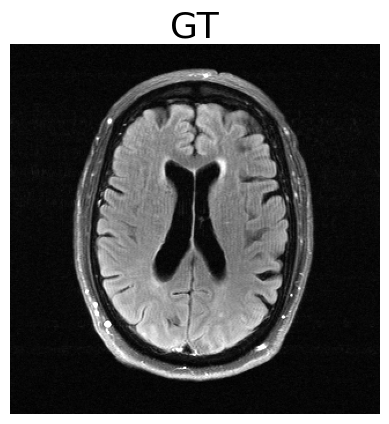

In [19]:
# GT
lower_percentile = 0.15
upper_percentile = 99.85

fig, ax = plt.subplots()
im = ax.imshow(GT[slice], cmap='gray', origin='lower', vmin=np.percentile(GT[slice], lower_percentile), vmax=np.percentile(GT[slice], upper_percentile))
#plt.colorbar(im, ax=ax)
# Increase the font size of the titles
plt.rcParams['axes.titlesize'] = 26
plt.title('GT')
plt.savefig('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/figures/reconstructions/GT_R=8.png')
ax.axis('off')
plt.show()


In [13]:
vmin, vmax = im.get_clim()


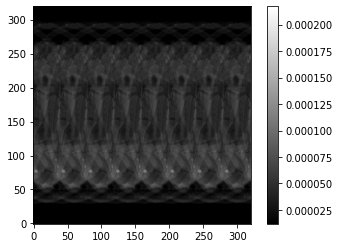

In [14]:
# ZF SENSE
plt.imshow(reconstruction_ZF_noACS[slice], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar()


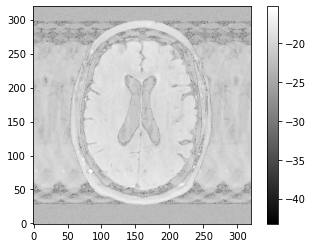

In [27]:
plt.imshow(np.log((GT[slice]-reconstruction_ZF_noACS[slice])**2), cmap='gray', origin='lower')
plt.colorbar()


In [28]:
print(f'NMSE: {nmse(GT,reconstruction_ZF_noACS)}')
print(f'PSNR: {psnr(GT,reconstruction_ZF_noACS)}')
print(f'SSIM: {ssim(GT,reconstruction_ZF_noACS)}')
print(f'VGG: {vgg_loss(GT,reconstruction_ZF_noACS)}')
print(f'SVD: {stacked_svd(GT,reconstruction_ZF_noACS)}')


NMSE: 0.4326535918137132
PSNR: 23.919658687022345
SSIM: [0.62521434]
VGG: 0.10483856499195099
SVD: 0.251953125


In [29]:
print(f'NMSE: {nmse_mask(GT,reconstruction_ZF_noACS,intersection_mask)}')
print(f'PSNR: {psnr_mask(GT,reconstruction_ZF_noACS,intersection_mask)}')
print(f'SSIM: {ssim_mask(GT,reconstruction_ZF_noACS,intersection_mask)}')
print(f'VGG: {vgg_loss_mask(GT,reconstruction_ZF_noACS,intersection_mask)}')
print(f'SVD: {stacked_svd_mask(GT,reconstruction_ZF_noACS,intersection_mask)}')


NMSE: 0.39920147578812
PSNR: 24.459684361417242
SSIM: [0.75890242]
VGG: 0.09922612458467484
SVD: 0.224609375


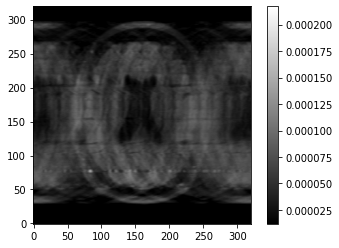

In [13]:
# ZF CS
plt.imshow(reconstruction_ZF_noACS_cs[slice], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar()


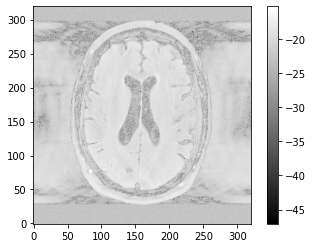

In [14]:
plt.imshow(np.log((GT[slice]-reconstruction_ZF_noACS_cs[slice])**2), cmap='gray', origin='lower')
plt.colorbar()


In [15]:
print(f'NMSE: {nmse(GT,reconstruction_ZF_noACS_cs)}')
print(f'PSNR: {psnr(GT,reconstruction_ZF_noACS_cs)}')
print(f'SSIM: {ssim(GT,reconstruction_ZF_noACS_cs)}')
print(f'VGG: {vgg_loss(GT,reconstruction_ZF_noACS_cs)}')
print(f'SVD: {stacked_svd(GT,reconstruction_ZF_noACS_cs)}')


NMSE: 0.37305047929305557
PSNR: 24.563404441686707
SSIM: [0.61406146]
VGG: 0.10512951761484146
SVD: 0.275


In [16]:
print(f'NMSE: {nmse_mask(GT,reconstruction_ZF_noACS_cs,intersection_mask)}')
print(f'PSNR: {psnr_mask(GT,reconstruction_ZF_noACS_cs,intersection_mask)}')
print(f'SSIM: {ssim_mask(GT,reconstruction_ZF_noACS_cs,intersection_mask)}')
print(f'VGG: {vgg_loss_mask(GT,reconstruction_ZF_noACS_cs,intersection_mask)}')
print(f'SVD: {stacked_svd_mask(GT,reconstruction_ZF_noACS_cs,intersection_mask)}')


NMSE: 0.3094068059614393
PSNR: 25.56631424289185
SSIM: [0.78283906]
VGG: 0.10288393497467041
SVD: 0.23828125


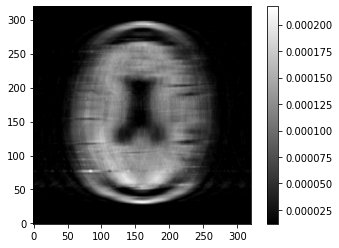

In [15]:
# ZF
plt.imshow(reconstruction_ZF[slice], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar()


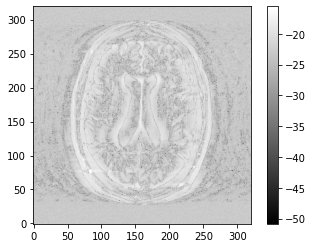

In [31]:
plt.imshow(np.log((GT[slice]-reconstruction_ZF[slice])**2), cmap='gray', origin='lower')
plt.colorbar()


In [32]:
print(f'NMSE: {nmse(GT,reconstruction_ZF)}')
print(f'PSNR: {psnr(GT,reconstruction_ZF)}')
print(f'SSIM: {ssim(GT,reconstruction_ZF)}')
print(f'VGG: {vgg_loss(GT,reconstruction_ZF)}')
print(f'SVD: {stacked_svd(GT,reconstruction_ZF)}')


NMSE: 0.09476713733193431
PSNR: 30.51452127021313
SSIM: [0.73495743]
VGG: 0.10361874103546143
SVD: 0.27421875


In [33]:
print(f'NMSE: {nmse_mask(GT,reconstruction_ZF,intersection_mask)}')
print(f'PSNR: {psnr_mask(GT,reconstruction_ZF,intersection_mask)}')
print(f'SSIM: {ssim_mask(GT,reconstruction_ZF,intersection_mask)}')
print(f'VGG: {vgg_loss_mask(GT,reconstruction_ZF,intersection_mask)}')
print(f'SVD: {stacked_svd_mask(GT,reconstruction_ZF,intersection_mask)}')


NMSE: 0.08478634476153957
PSNR: 31.188351010779627
SSIM: [0.85243088]
VGG: 0.10654830932617188
SVD: 0.230078125


(16, 20, 320, 320)


TypeError: Invalid shape (20, 320, 320) for image data

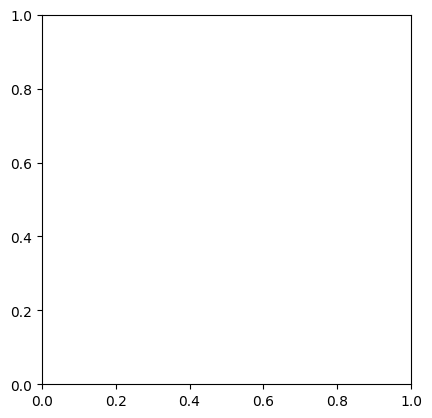

In [16]:
# Grappa
print(np.shape(reconstruction_grappa))
plt.imshow(reconstruction_grappa[slice], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
#plt.colorbar()
plt.rcParams['axes.titlesize'] = 26
plt.title('Grappa')
plt.savefig('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/figures/reconstructions/Grappa_R=4.png')


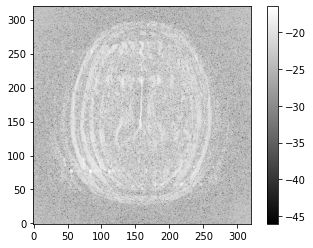

In [35]:
plt.imshow(np.log((GT[slice]-reconstruction_grappa[slice])**2), cmap='gray', origin='lower')
plt.colorbar()


In [36]:
print(f'NMSE: {nmse(GT,reconstruction_grappa)}')
print(f'PSNR: {psnr(GT,reconstruction_grappa)}')
print(f'SSIM: {ssim(GT,reconstruction_grappa)}')
print(f'VGG: {vgg_loss(GT,reconstruction_grappa)}')
print(f'SVD: {stacked_svd(GT,reconstruction_grappa)}')


NMSE: 0.06610109711839658
PSNR: 32.07899684401012
SSIM: [0.79038666]
VGG: 0.07917311042547226
SVD: 0.3794921875


In [37]:
print(f'NMSE: {nmse_mask(GT,reconstruction_grappa,intersection_mask)}')
print(f'PSNR: {psnr_mask(GT,reconstruction_grappa,intersection_mask)}')
print(f'SSIM: {ssim_mask(GT,reconstruction_grappa,intersection_mask)}')
print(f'VGG: {vgg_loss_mask(GT,reconstruction_grappa,intersection_mask)}')
print(f'SVD: {stacked_svd_mask(GT,reconstruction_grappa,intersection_mask)}')


NMSE: 0.05935993747663588
PSNR: 32.736666193490436
SSIM: [0.86734053]
VGG: 0.07899433374404907
SVD: 0.315234375


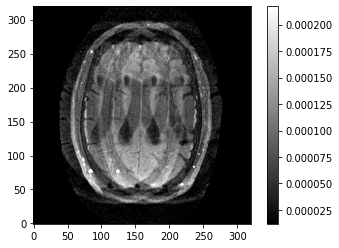

In [17]:
# Sense
plt.imshow(reconstruction_sense[slice], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar()


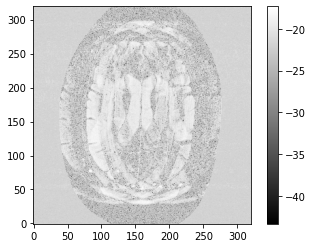

In [39]:
plt.imshow(np.log((GT[slice]-reconstruction_sense[slice])**2), cmap='gray', origin='lower')
plt.colorbar()


In [40]:
print(f'NMSE: {nmse(GT,reconstruction_sense)}')
print(f'PSNR: {psnr(GT,reconstruction_sense)}')
print(f'SSIM: {ssim(GT,reconstruction_sense)}')
print(f'VGG: {vgg_loss(GT,reconstruction_sense)}')
print(f'SVD: {stacked_svd(GT,reconstruction_sense)}')


NMSE: 0.12760413841106555
PSNR: 29.222455468259856
SSIM: [0.43091014]
VGG: 0.08195645362138748
SVD: 0.4234375


In [41]:
print(f'NMSE: {nmse_mask(GT,reconstruction_sense,intersection_mask)}')
print(f'PSNR: {psnr_mask(GT,reconstruction_sense,intersection_mask)}')
print(f'SSIM: {ssim_mask(GT,reconstruction_sense,intersection_mask)}')
print(f'VGG: {vgg_loss_mask(GT,reconstruction_sense,intersection_mask)}')
print(f'SVD: {stacked_svd_mask(GT,reconstruction_sense,intersection_mask)}')


NMSE: 0.08848471898874284
PSNR: 31.002926540159468
SSIM: [0.85911616]
VGG: 0.07691917568445206
SVD: 0.325390625


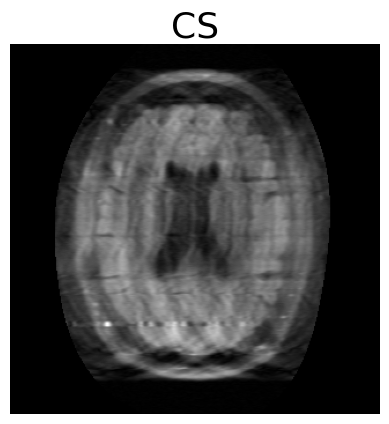

In [24]:
# CS
plt.imshow(reconstruction_CS[slice], cmap='gray', origin='lower') # , vmin=vmin, vmax=vmax   (deleted options gave better contrast)
# plt.colorbar()
plt.rcParams['axes.titlesize'] = 26
plt.title('CS')
plt.axis('off')
plt.savefig('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/figures/reconstructions/CS_R=8.png')



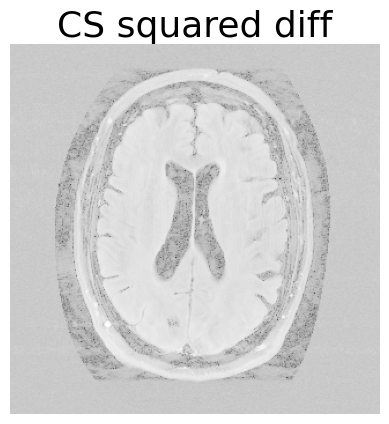

In [27]:
# plot the squared difference between T and reconstruction CS
plt.imshow(np.log((GT[slice]-reconstruction_CS[slice])**2), cmap='gray', origin='lower')
#plt.colorbar()
plt.rcParams['axes.titlesize'] = 26
plt.title('CS squared diff')
plt.axis('off')
plt.savefig('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/figures/reconstructions/CS_squareddiff_R=8.png')


In [44]:
print(f'NMSE: {nmse(GT,reconstruction_CS)}')
print(f'PSNR: {psnr(GT,reconstruction_CS)}')
print(f'SSIM: {ssim(GT,reconstruction_CS)}')
print(f'VGG: {vgg_loss(GT,reconstruction_CS)}')
print(f'SVD: {stacked_svd(GT,reconstruction_CS)}')


NMSE: 0.3691724862852144
PSNR: 24.608814636532216
SSIM: [0.33074648]
VGG: 0.10420247912406921
SVD: 0.26171875


In [28]:
print(f'NMSE: {nmse_mask(GT,reconstruction_CS,intersection_mask)}')
print(f'PSNR: {psnr_mask(GT,reconstruction_CS,intersection_mask)}')
print(f'SSIM: {ssim_mask(GT,reconstruction_CS,intersection_mask)}')
print(f'VGG: {vgg_loss_mask(GT,reconstruction_CS,intersection_mask)}')
print(f'SVD: {stacked_svd_mask(GT,reconstruction_CS,intersection_mask)}')


NMSE: 0.3408853013105033
PSNR: 25.145529798782242
SSIM: [0.75933062]


/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/conda/envs/DL_MRI_reconstruction_baselines/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


VGG: 0.10758677124977112
SVD: 0.2294921875


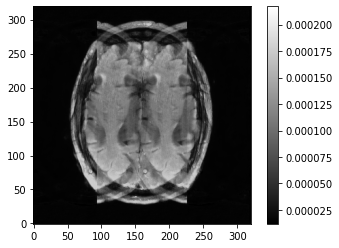

In [19]:
# ZF UNet without ACS
plt.imshow(reconstruction_ZF_unet_noACS[slice], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar()


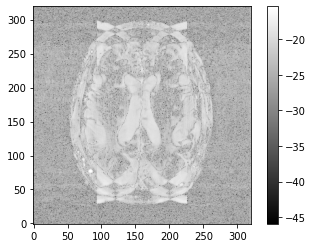

In [14]:
plt.imshow(np.log((GT[slice]-reconstruction_ZF_unet_noACS[slice])**2), cmap='gray', origin='lower')
plt.colorbar()


In [15]:
print(f'NMSE: {nmse(GT,reconstruction_ZF_unet_noACS)}')
print(f'PSNR: {psnr(GT,reconstruction_ZF_unet_noACS)}')
print(f'SSIM: {ssim(GT,reconstruction_ZF_unet_noACS)}')
print(f'VGG: {vgg_loss(GT,reconstruction_ZF_unet_noACS)}')
print(f'SVD: {stacked_svd(GT,reconstruction_ZF_unet_noACS)}')


NMSE: 0.11253234528039624
PSNR: 29.768175609260933
SSIM: [0.86230084]
VGG: 0.09196347743272781
SVD: 0.2501953125


In [16]:
print(f'NMSE: {nmse_mask(GT,reconstruction_ZF_unet_noACS,intersection_mask)}')
print(f'PSNR: {psnr_mask(GT,reconstruction_ZF_unet_noACS,intersection_mask)}')
print(f'SSIM: {ssim_mask(GT,reconstruction_ZF_unet_noACS,intersection_mask)}')
print(f'VGG: {vgg_loss_mask(GT,reconstruction_ZF_unet_noACS,intersection_mask)}')
print(f'SVD: {stacked_svd_mask(GT,reconstruction_ZF_unet_noACS,intersection_mask)}')


NMSE: 0.11539134541112907
PSNR: 29.84985316573052
SSIM: [0.87669293]
VGG: 0.09177642315626144
SVD: 0.240234375


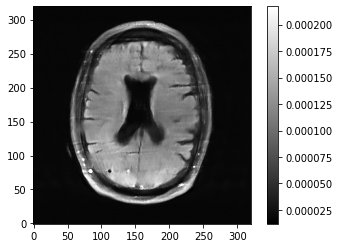

In [20]:
# ZF UNet
plt.imshow(reconstruction_ZF_unet[slice], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar()


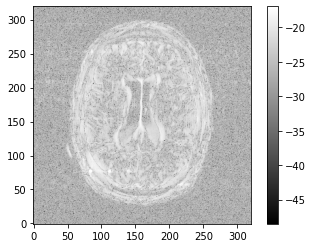

In [47]:
plt.imshow(np.log((GT[slice]-reconstruction_ZF_unet[slice])**2), cmap='gray', origin='lower')
plt.colorbar()


In [48]:
print(f'NMSE: {nmse(GT,reconstruction_ZF_unet)}')
print(f'PSNR: {psnr(GT,reconstruction_ZF_unet)}')
print(f'SSIM: {ssim(GT,reconstruction_ZF_unet)}')
print(f'VGG: {vgg_loss(GT,reconstruction_ZF_unet)}')
print(f'SVD: {stacked_svd(GT,reconstruction_ZF_unet)}')


NMSE: 0.036266367689356906
PSNR: 34.68598213596095
SSIM: [0.91652023]
VGG: 0.05699826776981354
SVD: 0.289453125


In [49]:
print(f'NMSE: {nmse_mask(GT,reconstruction_ZF_unet,intersection_mask)}')
print(f'PSNR: {psnr_mask(GT,reconstruction_ZF_unet,intersection_mask)}')
print(f'SSIM: {ssim_mask(GT,reconstruction_ZF_unet,intersection_mask)}')
print(f'VGG: {vgg_loss_mask(GT,reconstruction_ZF_unet,intersection_mask)}')
print(f'SVD: {stacked_svd_mask(GT,reconstruction_ZF_unet,intersection_mask)}')


NMSE: 0.0363655985058179
PSNR: 34.86468467772358
SSIM: [0.92878261]
VGG: 0.05809759721159935
SVD: 0.2650390625


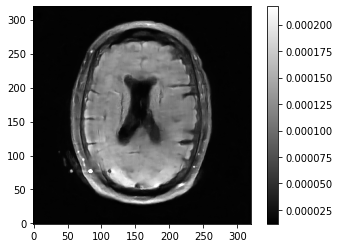

In [21]:
# Grappa UNet
plt.imshow(reconstruction_grappa_unet[slice], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar()


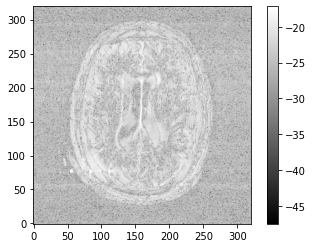

In [51]:
plt.imshow(np.log((GT[slice]-reconstruction_grappa_unet[slice])**2), cmap='gray', origin='lower')
plt.colorbar()


In [52]:
print(f'NMSE: {nmse(GT,reconstruction_grappa_unet)}')
print(f'PSNR: {psnr(GT,reconstruction_grappa_unet)}')
print(f'SSIM: {ssim(GT,reconstruction_grappa_unet)}')
print(f'VGG: {vgg_loss(GT,reconstruction_grappa_unet)}')
print(f'SVD: {stacked_svd(GT,reconstruction_grappa_unet)}')


NMSE: 0.03630715300797851
PSNR: 34.68113534062776
SSIM: [0.90606571]
VGG: 0.05969218537211418
SVD: 0.3173828125


In [53]:
print(f'NMSE: {nmse_mask(GT,reconstruction_grappa_unet,intersection_mask)}')
print(f'PSNR: {psnr_mask(GT,reconstruction_grappa_unet,intersection_mask)}')
print(f'SSIM: {ssim_mask(GT,reconstruction_grappa_unet,intersection_mask)}')
print(f'VGG: {vgg_loss_mask(GT,reconstruction_grappa_unet,intersection_mask)}')
print(f'SVD: {stacked_svd_mask(GT,reconstruction_grappa_unet,intersection_mask)}')


NMSE: 0.03529272522392911
PSNR: 34.99475018757546
SSIM: [0.92503381]
VGG: 0.06318435817956924
SVD: 0.2814453125


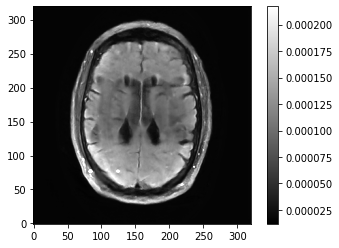

In [22]:
# Sense UNet
plt.imshow(reconstruction_sense_unet[slice], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar()


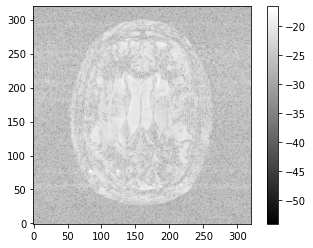

In [55]:
plt.imshow(np.log((GT[slice]-reconstruction_sense_unet[slice])**2), cmap='gray', origin='lower')
plt.colorbar()


In [56]:
print(f'NMSE: {nmse(GT,reconstruction_sense_unet)}')
print(f'PSNR: {psnr(GT,reconstruction_sense_unet)}')
print(f'SSIM: {ssim(GT,reconstruction_sense_unet)}')
print(f'VGG: {vgg_loss(GT,reconstruction_sense_unet)}')
print(f'SVD: {stacked_svd(GT,reconstruction_sense_unet)}')


NMSE: 0.042472609209019914
PSNR: 33.99992967128992
SSIM: [0.91296989]
VGG: 0.0576138012111187
SVD: 0.3015625


In [57]:
print(f'NMSE: {nmse_mask(GT,reconstruction_sense_unet,intersection_mask)}')
print(f'PSNR: {psnr_mask(GT,reconstruction_sense_unet,intersection_mask)}')
print(f'SSIM: {ssim_mask(GT,reconstruction_sense_unet,intersection_mask)}')
print(f'VGG: {vgg_loss_mask(GT,reconstruction_sense_unet,intersection_mask)}')
print(f'SVD: {stacked_svd_mask(GT,reconstruction_sense_unet,intersection_mask)}')


NMSE: 0.042105965422241924
PSNR: 34.22815584130948
SSIM: [0.93121411]
VGG: 0.059715546667575836
SVD: 0.27109375


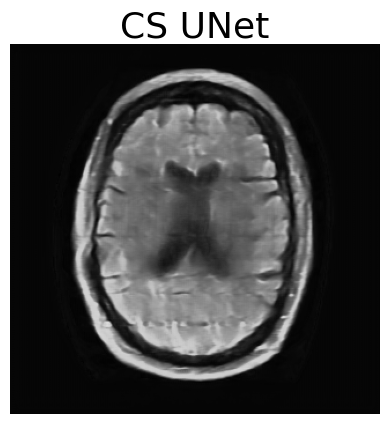

In [30]:
# CS UNet
plt.imshow(reconstruction_cs_unet[slice], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
# plt.colorbar()
plt.rcParams['axes.titlesize'] = 26
plt.title('CS UNet')
plt.axis('off')
plt.savefig('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/figures/reconstructions/CSUNet_R=8.png')


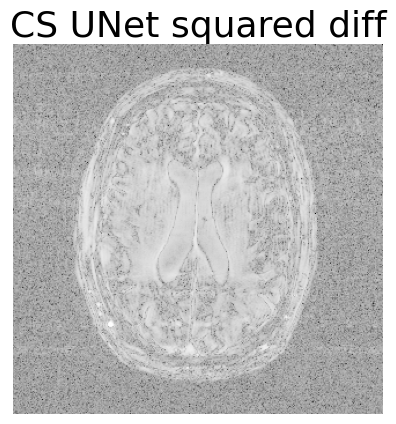

In [33]:
# squared difference between GT and CS UNet
plt.imshow(np.log((GT[slice]-reconstruction_cs_unet[slice])**2), cmap='gray', origin='lower')
#plt.colorbar()
plt.rcParams['axes.titlesize'] = 26
plt.title('CS UNet squared diff')
plt.axis('off')
plt.savefig('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/figures/reconstructions/CSUNet_squareddiff_R=8.png')


In [60]:
print(f'NMSE: {nmse(GT,reconstruction_cs_unet)}')
print(f'PSNR: {psnr(GT,reconstruction_cs_unet)}')
print(f'SSIM: {ssim(GT,reconstruction_cs_unet)}')
print(f'VGG: {vgg_loss(GT,reconstruction_cs_unet)}')
print(f'SVD: {stacked_svd(GT,reconstruction_cs_unet)}')


NMSE: 0.05523577697225225
PSNR: 32.85887529534796
SSIM: [0.87445114]
VGG: 0.07563704252243042
SVD: 0.289453125


In [32]:
print(f'NMSE: {nmse_mask(GT,reconstruction_cs_unet,intersection_mask)}')
print(f'PSNR: {psnr_mask(GT,reconstruction_cs_unet,intersection_mask)}')
print(f'SSIM: {ssim_mask(GT,reconstruction_cs_unet,intersection_mask)}')
print(f'VGG: {vgg_loss_mask(GT,reconstruction_cs_unet,intersection_mask)}')
print(f'SVD: {stacked_svd_mask(GT,reconstruction_cs_unet,intersection_mask)}')


NMSE: 0.05290420214324558
PSNR: 33.23670011072674
SSIM: [0.91184666]
VGG: 0.07883719354867935
SVD: 0.25859375
